In [1]:
  # Importing library
%matplotlib inline

In [2]:
  # Importing external packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
  # File to Load 
city_data = r"C:\Users\JamesGarner\Desktop\BootCamp\Module 5\PyBer_Analysis\resources\city_data.csv"
ride_data = r"C:\Users\JamesGarner\Desktop\BootCamp\Module 5\PyBer_Analysis\resources\ride_data.csv"

In [7]:
  # Read the City and store Pandas data frame
city_data_df = pd.read_csv(city_data)
#city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [8]:
  # Read the Ride Data and store Pandas data frame
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [9]:
 # Combine the data into a single dataset and display the data table for preview
pyber_df = pd.merge(ride_data_df,city_data_df, on="city", how="left")
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Bubble Plot of Ride Sharing Data

In [10]:
  # Declare data frames for the city type(urban_rural,suburban) and then group by city
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

In [11]:
   # Running some calculations: ride count (x), fare average(y), driver count average(s as in size)  
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

FileNotFoundError: [Errno 2] No such file or directory: 'Images/1_TotalFaresCity.png'

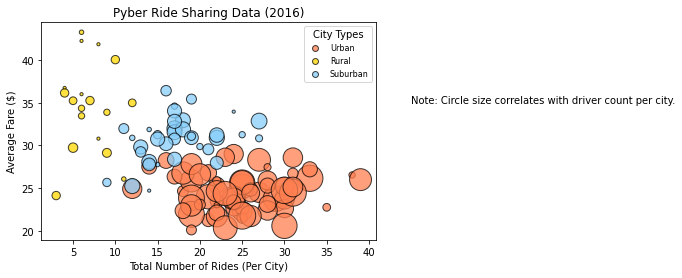

In [12]:
  # Tells matplotlib that we want to make a scatter plot , the size of each point on our plot is determined by their x value
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")

   #Add title, x axis label and y axis label.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(45, 35,"Note: Circle size correlates with driver count per city.")

  #Add the legend.
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

  # Adjust the legend 
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

  # Save Figure
plt.savefig()

  # Print out and save graph
plt.show()

## Total Fares by City Type

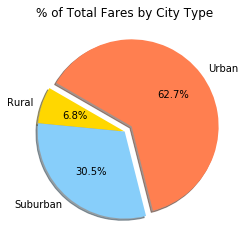

In [13]:
  # Sum of fares by city type
type_groupped = pyber_df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()
  # Set the labels
labels = ["Rural","Suburban","Urban"]
  # Only explode the third section of the pie chart
explode = (0,0, 0.1)
  # Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]
  # Create the pie chart
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
  # Add the legend
plt.title("% of Total Fares by City Type")
  # Save Figure
plt.savefig("Images/2_TotalFaresCityType.png")
  # Show Figure
plt.show()

## Total Rides by City Type

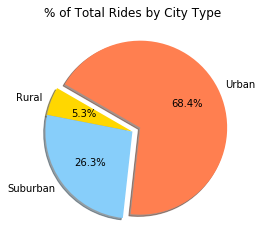

In [14]:
  # Count of rides by city type
type_groupped = pyber_df.groupby(['type'])
rides_count = type_groupped['ride_id'].count()
  # Set the labels
labels = ["Rural","Suburban","Urban"]
  # Only explode the third section of the pie chart
explode = (0,0, 0.1)
  # Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]
  # Create the pie chart
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
  # Add the legend
plt.title("% of Total Rides by City Type")
  # Save Figure
plt.savefig("Images/3_TotalRidesCityType.png")
  # Show Figure
plt.show()

## Total Drivers by City Type

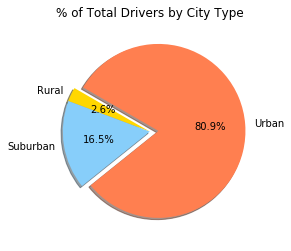

In [15]:
  # Sum of fares by city type
type_groupped_drivers = city_data_df.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()
  # Set the labels
labels = ["Rural","Suburban","Urban"]
  # Only explode the third section of the pie chart
explode = (0,0, 0.1)
  # Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]
  # Create the pie chart
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
  # Add the legend
plt.title("% of Total Drivers by City Type")
  # Save Figure
plt.savefig("Images/4_TotalDriversCityType.png")
  # Show Figure
plt.show()